# Data Exploration


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

os.chdir("../")

from generics import Paths

In [6]:
train_csv = pd.read_csv(
    r"C:\Users\Tabio\Desktop\uni\RU\mlip\project1\MLiP_group_10_task1_HMS\data\kaggle\input\hms-harmful-brain-activity-classification\train.csv"
)

vote_cols = [
    "seizure_vote",
    "lpd_vote",
    "gpd_vote",
    "lrda_vote",
    "grda_vote",
    "other_vote",
]

train_csv["max_vote"] = train_csv[vote_cols].max(axis=1)

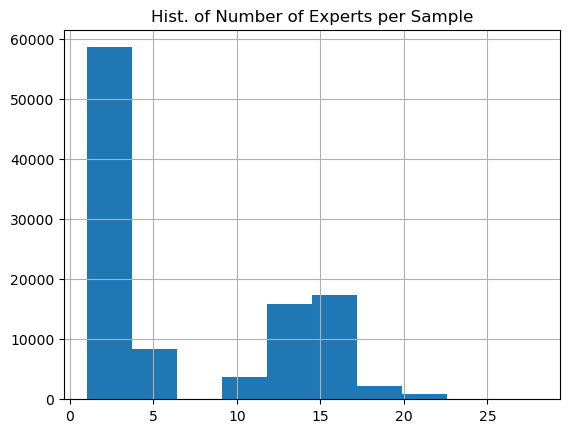

In [7]:
train_csv["total_votes"] = train_csv[vote_cols].sum(axis=1)

train_csv["total_votes"].hist()
plt.title("Hist. of Number of Experts per Sample")
plt.show()

In [9]:
max(train_csv["total_votes"])

28

0.477874531835206


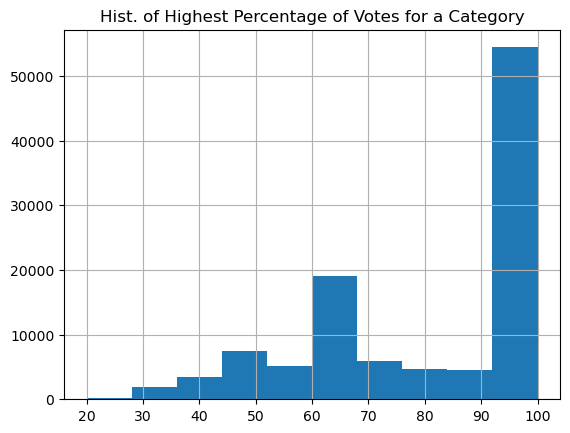

In [4]:
print(
    sum(train_csv["max_vote"] / train_csv["total_votes"] == 1) / len(train_csv)
)  # ratio having full agreement

(100 * train_csv["max_vote"] / train_csv["total_votes"]).hist()
plt.title("Hist. of Highest Percentage of Votes for a Category")
plt.show()

# Class Distribution


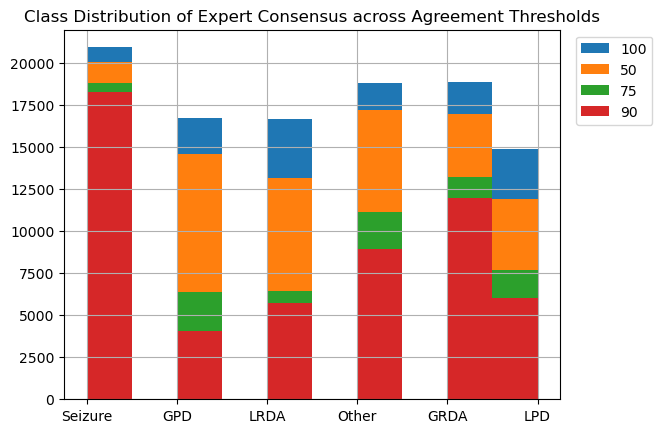

In [20]:
from utils.data_preprocessing_utils import filter_by_agreement


train_csv["expert_consensus"].hist(label=100)

thresholds = [50, 75, 90]

for thresh in thresholds:
    filter_by_agreement(train_csv, thresh)["expert_consensus"].hist(label=thresh)

plt.title("Class Distribution of Expert Consensus across Agreement Thresholds")
plt.legend(bbox_to_anchor=(1.2, 1.0))
plt.show()